IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*


# TD-TME 4 : Introspection des modèles et descente de gradient

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

LIN Charles, WANG Zhe

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-04</tt> et rajouter à la suite de <tt>tme-04</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-04-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

In [1]:
# Pour connaître la version de python utilisée:
import sys
print("Version Python: ",sys.version)

# une version >= 3.7 est recommandée

Version Python:  3.7.3 (default, Jan 22 2021, 20:04:44) 
[GCC 8.3.0]


In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

## Création d'une librairie

<div class="alert alert-block alert-success">

Afin de pouvoir réutiliser les classes et fonctions écrites précédemment dans les séances de TDTME, vous allez construire une librairie avec vos fonctions.

Cette librairie, qui s'appellera IADS, contiendra toutes les classes et fonctions que vous allez développer lors de vos séances de TDTME. Elle sera construite donc séance après séance par l'ajout des nouvelles classes et fonctions que vous écrirez.

<font color="RED">Important:</font> dans un premier temps, vous devez écrire les classes et fonctions demandées dans le notebook de la séance de TDTME courante. A la séance suivante, ou une fois que tout fonctionne correctement, vous rajouterez les classes et fonctions écrites et testées dans vos fichiers de la librairie IADS pour pouvoir réutiliser vos classifieurs par la suite dans les séances suivantes.

Récupérer et désarchiver l'archive iads.tgz de telle sorte que le répertoire `iads` soit un répertoire frère du répertoire `tme03`.

Ainsi, vous devrez avoir une arborescence qui ressemble à ça:

    - LU3IN026/
        - tme-01/
            - tme-01.ipynb
        - tme-02/
            - tme-02.ipynb
        - tme-03/
            - tme-03.ipynb
        - tme-04/
            - tme-04.ipynb
        - iads/
            - Classifiers.py
            - utils.py
            - evaluation.py
            - __init__.py
          

<b>Important</b> :
- ce fichier tme-04.ipynb doit toujours rester dans le répertorie tme-04/
- pour ouvrir les fichiers python (extension .py) qui se trouvent dans le répertoire iads/ il est nécessaire d'utiliser un éditeur de texte comme emacs, gedit, idle,...
</div>

<font color="RED" size="+1">**[Q]**</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Pour compléter ces fichiers, reprendre le code écrit dans les TDTME précédents.
- dans `utils.py`, il faut compléter les fonctions `plot2DSet`, `genere_dataset_uniform`, `genere_dataset_gaussian`, et `create_XOR`
- dans `Classifiers.py`, il faut compléter le code des classifiers que vous avez déjà définis

<font color="RED" size="+1">**[Q]**</font> **Mise à jour de la librairie `iads`**

En premier lieu, vérifier que votre librairie `iads` est bien à jour : elle doit maintenant contenir toutes les fonctions et classes que mises au point et testées dans les séances précédentes. Une fois à jour, importer la librairie pour pouvoir l'utiliser dans ce notebook:

In [3]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

<b>Attention:</b> à partir d'ici, lorsque vous voulez utiliser un algorithme qui se trouve dans le fichier `Classifier.py` il est nécessaire de préfixer son nom par `classif.` et pour utiliser une fonction du fichier `utils.py`, il faut préfixer le nom de la fonction par `ut.`


Dans les boîtes qui vont suivre, on appliquera ce principe.

Taille du dataset généré : (40, 2) exemples


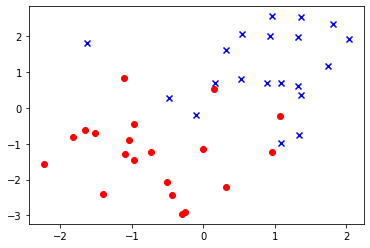

In [4]:
# REMARQUE: une fois les importations faites, les fonctions de utils sont utilisables
#  en mettant ut. devant leur nom:

# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

d_desc_gauss, d_lab_gauss = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-0.5,-1]),np.array([[1,0],[0,1]]),20)

print("Taille du dataset généré :", np.shape(d_desc_gauss), "exemples")

# Affichage :
ut.plot2DSet(d_desc_gauss,d_lab_gauss)

Accuracy :  0.9


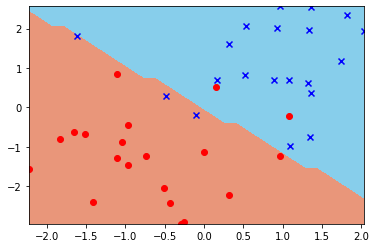

In [5]:
# De même, les classes de Classifiers sont utilisables en mettant classif. devant leur nom:
# Création d'un perceptron
perceptron = classif.ClassifierPerceptron(2,0.01)

data = d_desc_gauss
label = d_lab_gauss

perceptron.train(data, label)
print("Accuracy : ", perceptron.accuracy(data,label))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(data,label,perceptron)
ut.plot2DSet(data,label)

Voilà, à partir de maintenant, vous pourrez donc ainsi réutiliser dans vos notebooks des classes et des fonctions écrites précédemment sans avoir à recopier tout le code implémenté !

## Fonctions d'affichages avancées

Dans cette première partie, nous abordons deux choses: 
1. un complément sur les fonctions d'affichage
1. un petit complément sur le perceptron

Commençons donc par l'affichage. L'idée est de faire un mini tutoriel sur l'affichage 3D, les isocontours etc... Dans toutes ces situations, il faut d'abord créer une grille de points puis évaluer votre fonction sur tous les points de la grille. Les fonctions proposées se chargent de l'interpolation entre les points de la grille. 

Il faut ensuite penser à ajouter les points du jeu de données et à sauvegarder le tout.

Ces nouvelles fonctions vont vous permettre de bien comprendre ce qui se passe en terme de décision dans l'espace de représentation des points.

In [6]:
def plot_frontiere_V3(desc_set, label_set, w, kernel, step=30, forme=1, fname="out/tmp.pdf"):
    """ desc_set * label_set * array * function * int * int * str -> NoneType
        Note: le classifieur linéaire est donné sous la forme d'un vecteur de poids pour plus de flexibilité
    """
    # -----------
    # ETAPE 1: construction d'une grille de points sur tout l'espace défini par les points du jeu de données
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # -----------
    # Si vous avez du mal à saisir le concept de la grille, décommentez ci-dessous
    #plt.figure()
    #plt.scatter(grid[:,0],grid[:,1])
    #if True:
    #    return
    
    # -----------
    # ETAPE 2: calcul de la prediction pour chaque point de la grille
    res=np.array([kernel(grid[i,:])@w for i in range(len(grid)) ])
    # pour les affichages avancés, chaque dimension est présentée sous la forme d'une matrice
    res=res.reshape(x1grid.shape) 
    
    # -----------
    # ETAPE 3: le tracé
    #
    # CHOIX A TESTER en décommentant:
    # 1. lignes de contours + niveaux
    if forme <= 2 :
        fig, ax = plt.subplots() # pour 1 et 2
        ax.set_xlabel('X_1')
        ax.set_ylabel('X_2')
    if forme == 1:
        CS = ax.contour(x1grid,x2grid,res)
        ax.clabel(CS, inline=1, fontsize=10)
    #
    # 2. lignes de contour 0 = frontière 
    if forme == 2:
        CS = ax.contour(x1grid,x2grid,res, levels=[0], colors='k')
    #
    # 3. fonction de décision 3D
    if forme == 3 or forme == 4:
        fig = plt.gcf()
        ax = fig.gca(projection='3d') # pour 3 et 4
        ax.set_xlabel('X_1')
        ax.set_ylabel('X_2')
        ax.set_zlabel('f(X)')
    # 
    if forme == 3:
        surf = ax.plot_surface(x1grid,x2grid,res, cmap=cm.coolwarm)
    #
    # 4. fonction de décision 3D contour grid + transparence
    if forme == 4:
        norm = plt.Normalize(res.min(), res.max())
        colors = cm.coolwarm(norm(res))
        rcount, ccount, _ = colors.shape
        surf = ax.plot_surface(x1grid,x2grid,res, rcount=rcount, ccount=ccount, facecolors=colors, shade=False)
        surf.set_facecolor((0,0,0,0))
    
    # -----------
    # ETAPE 4: ajout des points
    negatifs = desc_set[label_set == -1]     # Ensemble des exemples de classe -1
    positifs = desc_set[label_set == +1]     # +1 
    # Affichage de l'ensemble des exemples en 2D:
    if forme <= 2:
        ax.scatter(negatifs[:,0],negatifs[:,1], marker='o', c='b') # 'o' pour la classe -1
        ax.scatter(positifs[:,0],positifs[:,1], marker='x', c='r') # 'x' pour la classe +1
    else:
        # on peut ajouter une 3ème dimension si on veut pour 3 et 4
        ax.scatter(negatifs[:,0],negatifs[:,1], -1, marker='o', c='b') # 'o' pour la classe -1
        ax.scatter(positifs[:,0],positifs[:,1], 1,  marker='x', c='r') # 'x' pour la classe +1
    
    # -----------
    # ETAPE 5 en 3D: régler le point de vue caméra:
    if forme == 3 or forme == 4:
        ax.view_init(20, 70) # a régler en fonction des données
    
    # -----------
    # ETAPE 6: sauvegarde (le nom du fichier a été fourni en argument)
    if fname != None:
        # avec les options pour réduires les marges et mettre le fond transprent
        plt.savefig(fname,bbox_inches='tight', transparent=True,pad_inches=0)

La boite suivante permet de tester la fonction `plot_frontiere_V3`.

**Important**: avant de l'exécuter, créer le répertoire `out` dans le répertoire courant (celui qui contient ce notebook). Ce répertoire `out` est utilisé pour sauvegarder, au format PDF, les figures obtenues.

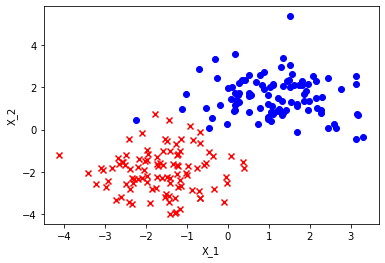

In [7]:
np.random.seed(42)   # on prend 42 comme graine

# test de la fonction ci-dessus
# NOTE: le test est générique... Mais il est améliorable en déléguant la génération de données
# aux fonctions que vous avez mise en place dans utils

# Génération rapide d'un jeu de données 2D:
N = 100
sig1  = np.array([[1, 0],[0,1]])
sig2  = np.array([[1, 0],[0,1]])
mu1   = np.array([-1.5, -2])
mu2   = np.array([1, 1.5])
sig_b = 3
Y = np.array([1]*N + [-1]*N)
X = np.random.randn(2*N,2)
X[Y==1]  = X[Y==1]  @ sig1 + mu1
X[Y==-1] = X[Y==-1] @ sig2 + mu2

w = np.array([1, 1])

def k_id(x): # fonction identité (juste pour être compatible avec les kernels ensuite)
    return x

f = 0 # A tester : 0, 1, 2, 3, 4 
plot_frontiere_V3(X, Y, w, k_id, step=10, forme = f, fname="out/test"+str(f)+".png")
# REMARQUE: l'extention peut être changée en ".pdf" pour générer un fichier image en PDF

# --> un fichier a été créé dans le répertoire out

Aller dans le répertoire `out` avec un navigateur de fichier et ouvrir le fichier `test0.png` obtenu.

## Compléments sur le perceptron

Afin d'améliorer notre classe `ClassifierPerceptron`, nous allons considérer une version modifiée de cette classe, que nous appellerons `ClassifierPerceptronBias` et qui construira un perceptron avec:
- un biais qui facilite la convergence du modèle: le critère de mauvaise classification est remplacé par
$$ f(\mathbf x_i) y_i < 1 $$
où $f(\mathbf x_i)$ est le score obtenu pour $x_i$.

Idée: on veut que $f(\mathbf x_i)$ et $y_i$ soient du même signe ET que $f(\mathbf x_i)$ soit suffisamment grand (en valeur absolue)
C'est une version *stabilisée* du perceptron où les points ne sont considérés bien classés que lorsque $f(\mathbf x_i) y_i>1$. Dans le cas contraire, on met à jour les poids.
- la mise à jour des poids tient compte de ce biais: $$ w = w +\epsilon (y_i- f(\mathbf x_i))x $$

Cette nouvelle classe doit contenir :
- un attribut ```allw``` (par exemple, de type liste) pour stocker toutes les valeurs successives de ```w``` rencontrée lors de l'entraînement du perceptron. Cet attribut est donc à mettre jour lors de l'entraînement du perceptron, après chaque mise à jour des poids. Remarque: attention ! pour copier le vecteur $w$ penser à faire une copie profonde...
- un accesseur `get_allw()` permettant de récupérer la valeur de `allw`

<font color="RED" size="+1">**[Q]**</font> Ecrire la classe `ClassifierPerceptronBiais` (dans ce notebook, ou en complétant votre fichier `Classifiers.py`) et tester le code suivant qui doit être fonctionnel. 


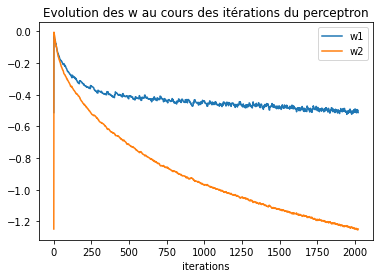

In [16]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = 2
eps = 5e-3

# Création et entraînement du perceptron sur les données générées

#### ATTENTION : commenter la ligne qui correspond à votre cas :
## La classe ClassifierPerceptronBiais a été mise dans Classifier.py
perc = classif.ClassifierPerceptronBiais(dim, eps)
## La classe ClassifierPerceptronBiais se trouve dans ce notebook:
#perc = ClassifierPerceptronBiais(dim, eps)


les_differences = perc.train(X, Y,)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
allw = np.array(perc.get_allw()) # si allw est sous forme de liste de couples [w1, w2]

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Sauvegarde de la figure obtenue (décommenter la ligne ci-dessous):
#plt.savefig('out/cvg.png')

<b>Remarque</b>: dans ce qui suit, on considére que la classe `ClassifierPerceptronBiais` se trouve dans le fichier `Classifier.py`, pensez à modifier son utilisation si ce n'est pas votre cas (ie. si votre classe se trouve dans ce notebook).

## Animation de l'évolution du perceptron

En combinant la récupération de tous les $w$ et les affichages précédents, on peut représenter l'évolution de de la frontière de décision au cours des itérations...

Attention, si le problème est trop simple, ça va converger une 1 itération et il n'y aura plus rien à voir !!

In [8]:
# Pour éviter certains warning dans jupyter, cela peut être utile:
import warnings
warnings.filterwarnings('ignore')

# tout le code est fourni, ce n'est que de l'affichage
# on génère les images associées à l'évolution de l'algo
for i in range(20): # borne arbitraire (ca converge très vite sur les cas simples)
    plot_frontiere_V3(X, Y, allw[i], k_id, step=10, forme = 4, fname="out/evol_percep_{:02}.png".format(i))
    plt.clf() # pour ne pas que les plot se superposent
    
print("Les figures ont été sauvegardées dans votre répertoire out !")    

Les figures ont été sauvegardées dans votre répertoire out !


<Figure size 432x288 with 0 Axes>

In [9]:
# si vous avez convert/imagemagick installé sur votre ordinateur: => Faire un gif animé :)
# rapppel: avec le !, vous invoquez des commandes dans la console
!convert -delay 50 -antialias -dispose previous out/evol_percep_* out/anim_pcp.gif


# Remarque: le résultat est dans le répertoire out/

**ATTENTION**: la commande précédente génére beaucoup de fichiers dans votre répertoire `out`, pensez à les supprimer une fois que vous n'en avez plus besoin pour ne pas encombrer votre espace disque...

# Lien avec l'optimisation des fonctions de coût

Après ces rappels de code, nous entrons maintenant dans le vif du sujet !

Nous avons vu en cours que l'évolution des poids du perceptron correspond en réalité à l'optimisation de la fonction coût:

$$ \mathcal C = \sum_{i=1}^N (1- f(\mathbf x_i) y_i)_+, \qquad \mbox{avec: } 
(\alpha)_+ = \left\{\begin{array}{ll}
\alpha & \mbox{ si } \alpha >0\\
0 & \mbox{ sinon }
\end{array}\right.$$

Nous utilisons ici une version *stabilisée* du perceptron où les points ne sont bien classé que lorsque $f(\mathbf x_i) y_i>1$

Le perceptron est une simple descente de gradient.


Les questions que l'on se pose sont double:
1. Quelle est l'évolution de $\mathcal C$ au cours des itérations
1. Quel chemin prennent les $w$ dans le cas 2D?

<font color="RED" size="+1">**[Q]**</font> Donner les instructions qui permettent de tracer l'évolution du coût au cours des itérations d'apprentissage;

Text(0.5, 1.0, 'Evolution du coût')

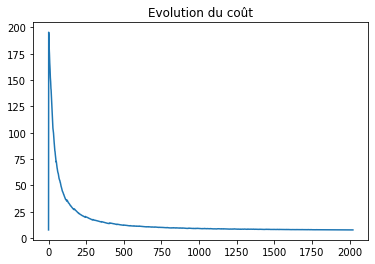

In [10]:
# calcul de C pour les différentes valeurs de w puis affichage de la courbe correspondante



### Evolution des poids dans l'espace des paramètres

Le code est presque entièrement donné ci-dessous... Sauf une ligne critique
Il faut absolument comprendre la signification du code et de l'image produite


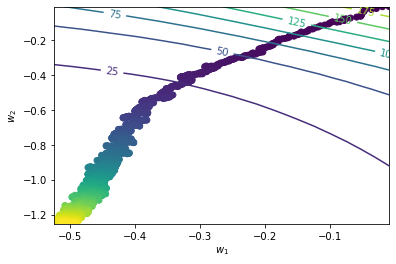

In [11]:
# Evolution des poids dans l'espace des paramètres
# le code est presque entièrement donné... Sauf une ligne critique
# Il faut absolument comprendre la signification du code et de l'image produite

# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# 2. Evaluation du cout pour toutes ces solutions potentielles

##########
# LIGNE A COMPLETER:
# construction de res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

# res = # <-------------------------- A COMPLETER  ---------------


##########

# remise en forme de res
res=res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw[:,0], allw[:,1], c=np.arange(len(allw)))

# Sauvegarde de la figure obtenue (décommenter la ligne ci-dessous):
#plt.savefig("out/espace_param.png")

La solution initiale $w=[0,0]$ correspond à un coût élevé. L'algorithme du perceptron fait évoluer les poids du modèle pou aller dans une zone de l'espace où le cout est moindre.

**ATTENTION** à ne pas confondre l'espace de représentation des points (où les axes sont $X_1,X_2$) et l'espace de représentation des paramètres (ici, où chaque point correspond à un classifieur associé à un niveau de coût = le fait de faire plus ou moins d'erreurs)

# Validation Croisée

La procédure de la validation croisée est au centre de la plupart des applications de machine learning: il est temps pour nous de travailler sur une implémentation.

L'idée est de concevoir la fonction suivante:
```
Xapp,Yapp,Xtest,Ytest = crossval(X, Y, n_iterations, iteration)
```
- ```X, Y``` sont les données du dataset **mélangées aléatoirement**
- ```n_iterations``` est le nombre d'ensembles de test au total.
- ```iteration``` est l'itération concernée: on ne renvoit pas les mêmes données en fonction des itérations.

Après séparation des indices en ```n_iterations``` groupes, isoler 1 groupe pour le test et les autres pour l'apprentissage.

**Note** Pour mélanger les données, vous pourrez utiliser les commandes suivantes:
```
index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

# check: malgré le mélange, les données doivent être les mêmes
plt.figure()
plt.scatter(Xm[Ym==1,0], Xm[Ym==1,1], c='b')
plt.scatter(Xm[Ym==-1,0], Xm[Ym==-1,1], c='r')
```


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `crossval`

In [12]:
def crossval(X, Y, n_iterations, iteration):
    #############
    # A COMPLETER
    #############    
    return Xapp, Yapp, Xtest, Ytest



In [14]:
np.random.seed(42)   # on prend 42 comme graine

# Exemple d'utilisation avec un dataset jouet (1 Dimension)
N = 24  # Nombre d'exemples dans le dataset
Xtoy = np.arange(N).reshape(N,1)
Ytoy = np.array([-1]*(N//2) + [1]*(N//2))
index = np.random.permutation(len(Xtoy)) # mélange des index
XtoyMelange = Xtoy[index]
YtoyMelange = Ytoy[index]

niter = 3
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(XtoyMelange, YtoyMelange, niter, i)
    print("========== ITERATION : ",i," ==========")
    print(" Xapp=", Xapp.T,"\n","Yapp=", Yapp,"\n","Xtest=",Xtest.T,"\n","Ytest=", Ytest)

========== ITERATION :  0  ==========
 Xapp= [[21  5  2 12 15  3  4 22 17 20 23  7 10 14 19  6]] 
 Yapp= [ 1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1] 
 Xtest= [[ 8 16  0 18 11  9 13  1]] 
 Ytest= [-1  1 -1  1 -1 -1  1 -1]
========== ITERATION :  1  ==========
 Xapp= [[ 8 16  0 18 11  9 13  1 17 20 23  7 10 14 19  6]] 
 Yapp= [-1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1  1  1 -1] 
 Xtest= [[21  5  2 12 15  3  4 22]] 
 Ytest= [ 1 -1 -1  1  1 -1 -1  1]
========== ITERATION :  2  ==========
 Xapp= [[ 8 16  0 18 11  9 13  1 21  5  2 12 15  3  4 22]] 
 Yapp= [-1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1  1] 
 Xtest= [[17 20 23  7 10 14 19  6]] 
 Ytest= [ 1  1  1 -1 -1  1  1 -1]


<font color="RED" size="+1">**[Q]**</font> Pour bien faire les choses, il faut séparer les ensembles en respectant la distribution des classes dans le dataset de départ. Ecrire la fonction `crossval_strat` qui effectue la même chose que la fonction précédente mais en découpant par classe.


In [15]:
# code de la validation croisée (version qui respecte la distribution des classes)

def crossval_strat(X, Y, n_iterations, iteration):
    #############
    # A COMPLETER
    #############    
    return Xapp, Yapp, Xtest, Ytest


In [17]:
np.random.seed(42)   # on prend 42 comme graine

# Exemple d'utilisation avec un dataset jouet (1 Dimension)
N = 24  # Nombre d'exemples dans le dataset
Xtoy = np.arange(N).reshape(N,1)
Ytoy = np.array([-1]*(N//2) + [1]*(N//2))
index = np.random.permutation(len(Xtoy)) # mélange des index
XtoyMelange = Xtoy[index]
YtoyMelange = Ytoy[index]

niter = 3
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(XtoyMelange, YtoyMelange, niter, i)
    print("========== ITERATION : ",i," ==========")
    print(" Xapp=", Xapp.T,"\n","Yapp=", Yapp,"\n","Xtest=",Xtest.T,"\n","Ytest=", Ytest)

========== ITERATION :  0  ==========
 Xapp= [[ 1  5  2 12 15  3  4 22 17 20 23  7 10 14 19  6]] 
 Yapp= [-1 -1 -1  1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1] 
 Xtest= [[ 8  0 11  9 16 18 13 21]] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  1  ==========
 Xapp= [[ 8 16  0 18 11  9 13 21  4 20 23  7 10 14 19  6]] 
 Yapp= [-1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1 -1] 
 Xtest= [[ 1  5  2  3 12 15 22 17]] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  2  ==========
 Xapp= [[ 8 16  0 18 11  9 13  1 21  5  2 12 15  3 22 17]] 
 Yapp= [-1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1] 
 Xtest= [[ 4  7 10  6 20 23 14 19]] 
 Ytest= [-1 -1 -1 -1  1  1  1  1]


## Tests de la procédure de validation croisée 

Sur des données réelles et sur des données jouets


In [18]:
np.random.seed(42)   # on prend 42 comme graine
# test sur les données jouet X, Y supposées pré-existantes

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]
niter = 10
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    perceptron = classif.ClassifierPerceptron(2, 1e-2)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    
print("Perf ",perf)

Perf  [1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0]


<font color="RED" size="+1">**[Q]**</font> Tester la validation croisée sur les données USPS.

In [19]:
# test sur les données USPS
import pickle as pkl

data = pkl.load(open('ressources/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)

# Création d'un sous groupe de données
c1 = 4
c2 = 6
X12 = Xu[(Yu==c1) | (Yu==c2)]
Y12 = np.where(Yu[(Yu==c1) | (Yu==c2)]==1, 1, -1)


# ######################## A COMPLETER




Itération  0 : taille base apprentissage=  1008  taille base de test=  111
Itération  1 : taille base apprentissage=  1008  taille base de test=  111
Itération  2 : taille base apprentissage=  1008  taille base de test=  111
Itération  3 : taille base apprentissage=  1008  taille base de test=  111
Itération  4 : taille base apprentissage=  1008  taille base de test=  111
Itération  5 : taille base apprentissage=  1008  taille base de test=  111
Itération  6 : taille base apprentissage=  1008  taille base de test=  111
Itération  7 : taille base apprentissage=  1008  taille base de test=  111
Itération  8 : taille base apprentissage=  1008  taille base de test=  111
Itération  9 : taille base apprentissage=  1008  taille base de test=  111
Perf obtenues :  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


# Version multi-classes

Le perceptron est un algorithme fondamentalement bi-classes: il est même lié à la manière dont sont encodées les étiquettes $\{+1,-1\}$. La plupart des problèmes réels sont pourtant multi-classes (e.g. USPS).
Si cet algorithme a pu rester aussi classique, c'est qu'il existe une extension multi-classes simple et efficace: le *un-contre-tous*

<img src="ressources/multi2.png">

Il faut apprendre autant de classifieurs que de classes. 
Dans l'exemple ci-dessus, cela donne:

1. Traitement de la classe 0
1. redéfinition de:
$$Y_{tmp} = \left\{
\begin{array}{ll}
1 & \text{ si } Y == 0\\ -1 & \text{ si } Y == 1 || Y == 1\\
\end{array}
\right.
$$
1. apprentissage de $f_0$ sur $X,Y_{tmp}$
1. Traitement de la classe 1
1. redéfinition de:
$$Y_{tmp} = \left\{
\begin{array}{ll}
1 & \text{ si } Y == 1\\
-1 & \text{ si } Y == 0 || Y == 2\\
\end{array}\right.
$$
1. apprentissage de $f_1$ sur $X,Y_{tmp}$
1. etc...


En inférence, lorsqu'un nouveau point $\mathbf x$ est présenté il faut:
1. calculer $score = [f_0(\mathbf x),  f_1(\mathbf x), \ldots f_C(\mathbf x)]$
1. prédire $\text{argmax}_c (score)$


<font color="RED" size="+1">**[Q]**</font> Construire une classe `Perceptron_MC` pour faire de la prédiction multi-classes et tester le code sur les données USPS.

# Plus loin avec le multi-classes

On ne va pas définir une version multi-classe par classifieur binaire...
Il est possible de définir un classifieur générique multi-classe à partir de classifieur binaire (design pattern composite) en respectant le schéma suivant:

1. ```ClassifierMultiOAA``` prend un classifieur binaire en argument lors de la création. Il initialise une liste vide de classifieurs.

1. Dans la méthode ```train```, penser à cloner le classifeur de référence nCl fois.
Il faut utiliser la méthode ```deepcopy``` du module standard python ```copy```

1. Dans un boucle for, redéfinir les étiquette $ytmp$ et apprendre des classifieurs binaires

1. Dans ```score``` faire appel aux méthodes ```score``` des classifieurs binaires et stocker les résultats

1. Dans ```predict``` renvoyer l'argmax des scores.<BR>
**Note:** en faisant cette opération, on fait l'hypothèse que les étiquettes sont définies sur $[0,nCl]$. Pour lever cette hypothèse, il faudrait stocker les classes et convertir le résultat de argmax.

1. La fonction ```accuracy``` de la classe mère doit être compatible avec les définitions précédentes... Par exemple:
```
def accuracy(self, desc_set, label_set):
        yhat = np.array([self.predict(x) for x in desc_set])
        return np.where(label_set == yhat, 1., 0.).mean()
```


In [ ]:
# Donner la définition de la classe ClassifierMultiOAA

# Vous pouvez avoir besoin d'utiliser la fonction deepcopy de la librairie standard copy:
import copy 




In [21]:
# opération assez couteuse sur toutes les données !
# A faire dans une boite séparée

index = np.random.permutation(len(Yu))
Xm = Xu[index]
Ym = Yu[index]


In [ ]:
# validation croisée en multi-classes

niter = 10   # nombre d'itérations
perf_T = []  # accuracies sur la base d'apprentissage
perf_A = []  # accuracies sur la base de test

print("Attention: l'exécution peut prendre du temps !")
print("\nPerf A (apprentissage): ",perf_A)
print("\nPerf T (test) : ",perf_T)
##################### 

###### A COMPLETER

##################### 
print("\nPerf A (apprentissage): ",perf_A)
print("\nPerf T (test) : ",perf_T)

In [22]:

niter = 10   # nombre d'itérations
perf_T = []  # accuracies sur la base d'apprentissage
perf_A = []  # accuracies sur la base de test

print("Attention: l'exécution peut prendre du temps !")




Attention: l'exécution peut prendre du temps !
Itération  0 : taille base apprentissage=  5610  taille base de test=  619
Itération  1 : taille base apprentissage=  5610  taille base de test=  619
Itération  2 : taille base apprentissage=  5610  taille base de test=  619
Itération  3 : taille base apprentissage=  5610  taille base de test=  619
Itération  4 : taille base apprentissage=  5610  taille base de test=  619
Itération  5 : taille base apprentissage=  5610  taille base de test=  619
Itération  6 : taille base apprentissage=  5610  taille base de test=  619
Itération  7 : taille base apprentissage=  5610  taille base de test=  619
Itération  8 : taille base apprentissage=  5610  taille base de test=  619
Itération  9 : taille base apprentissage=  5610  taille base de test=  619

Perf A (apprentissage):  [0.8265597147950089, 0.8265597147950089, 0.8251336898395721, 0.8270944741532977, 0.8245989304812834, 0.8269162210338681, 0.8260249554367202, 0.8274509803921568, 0.82549019607843